In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# we will import a library of sklearn called 'make_classification' to quickly make classification dataset, similarly we can make regression and multilabel classification dataset too
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=500, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [3]:
X

array([[-1.79336584e-01, -1.30097592e+00],
       [-5.02490809e-01, -2.13845066e+00],
       [-1.34184156e+00, -1.57580406e+00],
       [ 7.76487098e-01, -7.26537779e-01],
       [-1.15481280e+00, -2.62242001e+00],
       [ 9.05848073e-01,  6.88578566e-01],
       [-7.30893314e-01, -8.63530513e-02],
       [ 6.93695961e-01, -2.77231115e-02],
       [ 1.87127396e-01, -7.32117914e-01],
       [ 7.55986471e-01,  4.38884738e-01],
       [ 2.54074501e+00, -1.28242688e+00],
       [-3.10319263e-02,  4.69022895e-01],
       [ 1.13419830e+00, -1.44454035e+00],
       [ 9.58869959e-01,  9.38715840e-01],
       [-1.54492348e-01, -9.77387594e-01],
       [ 7.58593765e-01,  1.21266996e+00],
       [ 1.65702064e-01, -2.08709548e+00],
       [ 1.38520783e+00,  8.03882795e-01],
       [ 1.75302572e+00,  6.27501871e-01],
       [ 4.08223759e-01,  3.54216982e-01],
       [ 2.48790345e-01,  1.17054017e+00],
       [-4.62585362e-01,  8.10314827e-01],
       [ 2.71055414e-02, -2.03653934e+00],
       [ 1.

In [4]:
y

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,

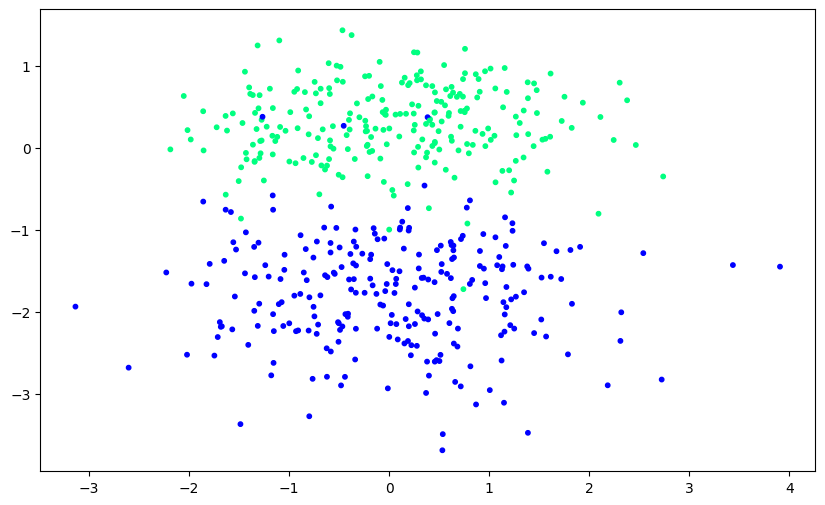

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c=y,cmap='winter',s=10)

In [6]:
X.shape[1]

2

In [7]:
X[0]

array([-0.17933658, -1.30097592])

Now that we have created the dataset, lets define our own perceptron

In [8]:
def round(z):
  return 1 if z>0 else 0

In [9]:
def perceptron(X,y):
  slope = []
  intercept = []


  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  learning_rate = 0.1
  epoch = 1000

  for i in range(epoch):
    data_point = np.random.randint(0,100)
    y_hat = round(np.dot(X[data_point],weights))
    weights = weights + learning_rate*(y[data_point]-y_hat)*X[data_point]

    slope.append(-(weights[1]/weights[2]))
    intercept.append(-(weights[0]/weights[2]))

  return weights[0],weights[1:],intercept,slope


In [10]:
intercept_,coef_,intercept,slope = perceptron(X,y)

In [11]:
print(intercept_)

0.9


In [12]:
print(coef_)

[0.08747194 1.41804707]


In [13]:
m = (-1)*(coef_[0]/coef_[1])
b = (-1)*(intercept_/coef_[1])

In [14]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

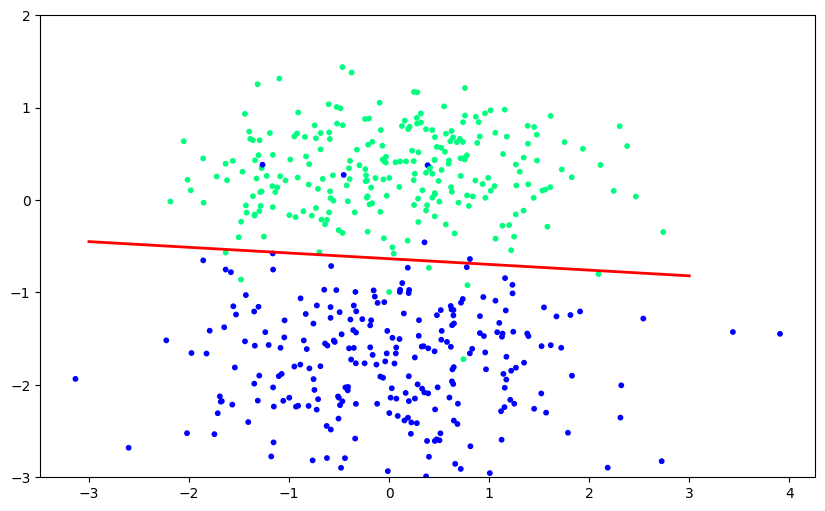

In [15]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=10)
plt.ylim(-3,2)

plt.show()

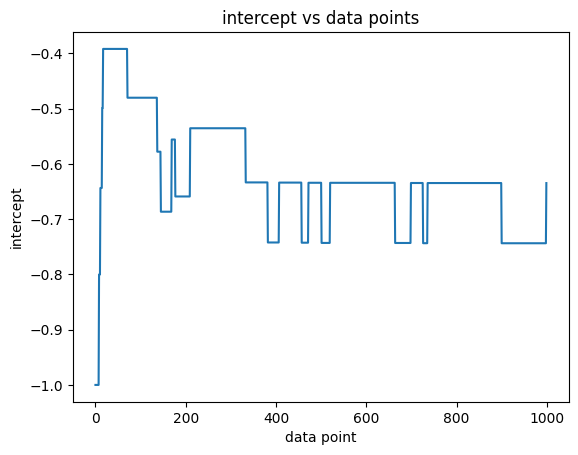

In [16]:

plt.plot(intercept)

plt.ylabel("intercept")
plt.xlabel("data point")
plt.title('intercept vs data points')

plt.show()

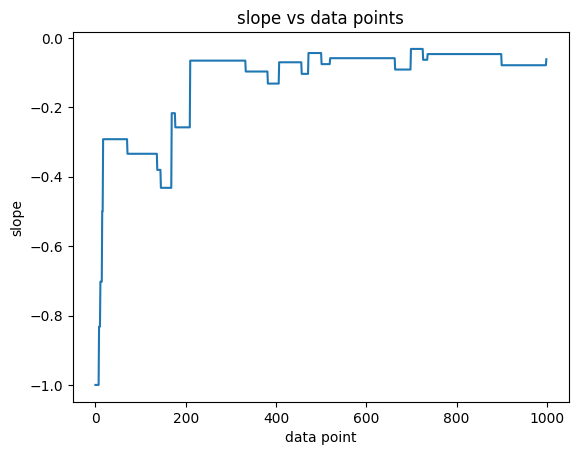

In [17]:
plt.plot(slope)

plt.ylabel("slope")
plt.xlabel("data point")
plt.title('slope vs data points')

plt.show()